<a href="https://colab.research.google.com/github/jeongj456/AI-algorithms/blob/main/Programming_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install gymnasium matplotlib numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.2 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import itertools
from random import randint
from array import array

In [ ]:
grid = np.zeros((4,4)) #this is how you define a 4x4 grid
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


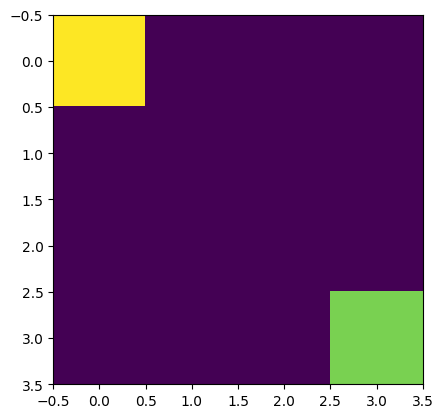

In [ ]:
pos1 = [0,0] #start position of our agent
pos2 = [3,3] #goal position of our agent
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.8

plt.imshow(grid)

In [ ]:
# Definition of the Grid Environment class.

class GridEnvironment(gym.Env):
    # Attribute of a Gym class that provides info about the render modes
    metadata = { 'render.modes': [] }

    # Initialization function
    def __init__(self):

      self.observation_space = spaces.Discrete(16)
      self.action_space = spaces.Discrete(4)
      self.max_timesteps = 100
      self.timestep = 0
      self.agent_pos = [0, 0]
      self.rewards = [-1, 1, -1, 3]
      self.reward_pos = [[0,3],[1,1],[2,0],[3,2]]
      self.goal_pos = [3, 3]
      self.state = np.zeros((4,4))
      self.state[tuple(self.agent_pos)] = 1
      self.state[tuple(self.goal_pos)] = 0.5

    # Reset function
    def reset(self, **kwargs):

      self.state = np.zeros((4,4))
      self.observation_space = spaces.Discrete(16)
      self.action_space = spaces.Discrete(4)
      self.max_timesteps = 100
      self.timestep = 0
      self.agent_pos = [0, 0]
      self.rewards = [-1, 1, -1, 3]
      self.reward_pos = [[0,3],[1,1],[2,0],[3,2]]
      self.goal_pos = [3, 3]
      self.state[tuple(self.agent_pos)] = 1
      self.state[tuple(self.goal_pos)] = 0.5
      for rp in self.reward_pos:
        self.state[tuple(rp)] = .75
      observation = self.state.flatten()

      info = {}

      return observation, info


    def check_if_goal_pos(self):
      if np.array_equal(self.agent_pos, self.goal_pos): #if agent position equals goal position
        self.state[tuple(self.goal_pos)] = 0.1
        self.timestep += 1
        return 10
      self.timestep += 1
      return 0

    def check_if_goal_pos1(self):
      if np.array_equal(self.agent_pos, self.goal_pos):
        return True

      return False

    def check_if_reward_pos(self):
      for rp in self.rewards:
        if np.array_equal(self.agent_pos, rp):
          self.rewards[self.reward_pos.index()]=0   #deletes the reward after it has been visited
          self.timestep += 1
          return self.rewards[self.reward_pos.index()]
        self.timestep += 1
        return 0



    # Step function: Contains the implementation for what happens when an
    # agent takes a step in the environment.
    def step(self, action):
      if action == 0: #left
        self.agent_pos[1] -= 1
      if action == 1: #down
        self.agent_pos[0] += 1
      if action == 2: #right
        self.agent_pos[1] += 1
      if action == 3: #up
        self.agent_pos[0] -= 1

      # Comment this to demonstrate the truncation condition.
      self.agent_pos = np.clip(self.agent_pos, 0, 3)

      self.state = np.zeros((4,4))

      self.state[tuple(self.goal_pos)] = 0.5
      for rp in self.reward_pos:
        self.state[tuple(rp)] = .75
      self.state[tuple(self.agent_pos)] = 1
      observation = self.state.flatten()

      reward = 0
      reward += self.check_if_reward_pos()
      reward += self.check_if_goal_pos()


      """
      reward = 0
      if np.array_equal(self.agent_pos, self.goal_pos):
        reward = 1
      """

      self.timestep += 1

      # Condition to check for termination (episode is over)
      terminated = True if self.timestep >= self.max_timesteps else False

      # Condition to check if agent is traversing to a cell beyond the permitted cells
      # This helps the agent to learn how to behave in a safe and predictable manner
      truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 3)) else False

      info = {}

      return observation, reward, terminated, truncated, info



    # Render function: Visualizes the environment
    def render(self):
      plt.title('Grid Environment')
      plt.imshow(self.state)

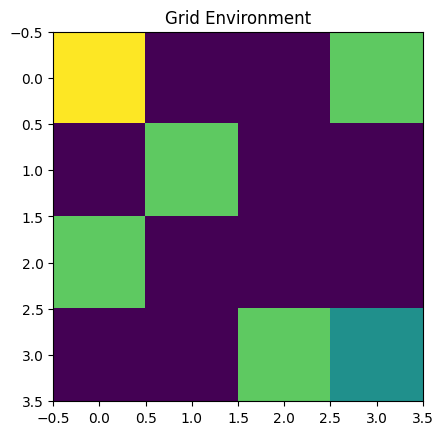

In [ ]:
env = GridEnvironment()

terminated, truncated = False, False
obs, info = env.reset()
env.render()


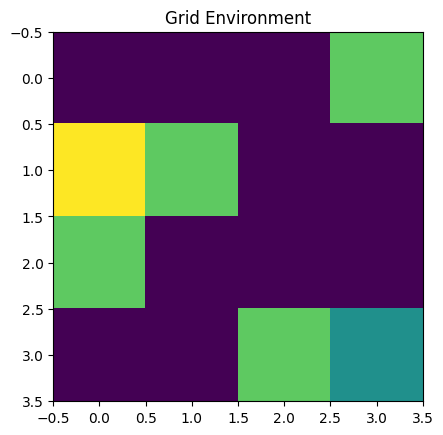

In [ ]:
action = 1
observation, reward, done, truncated, info = env.step(action)
env.render()

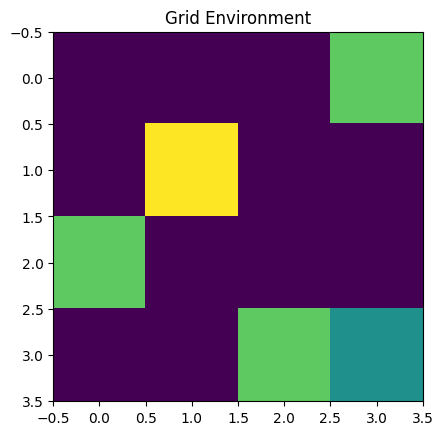

In [ ]:
action = 2
observation, reward, done, truncated, info = env.step(action)
env.render()

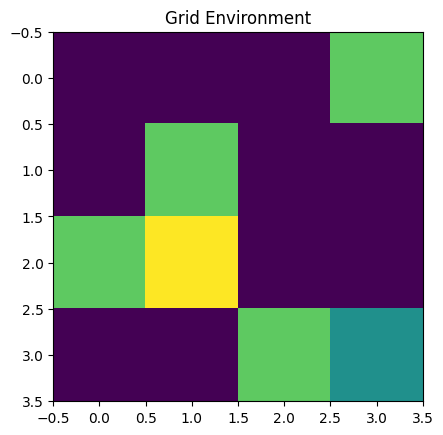

In [ ]:
action = 1
observation, reward, done, truncated, info = env.step(action)
env.render()

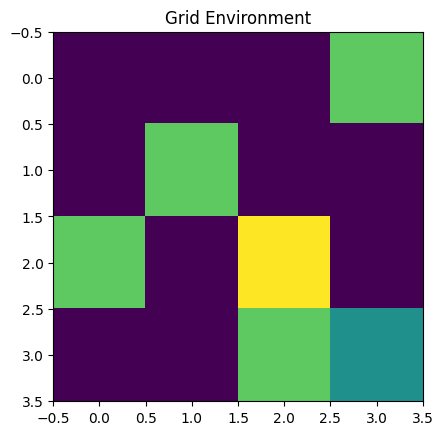

In [ ]:
action = 2
observation, reward, done, truncated, info = env.step(action)
env.render()

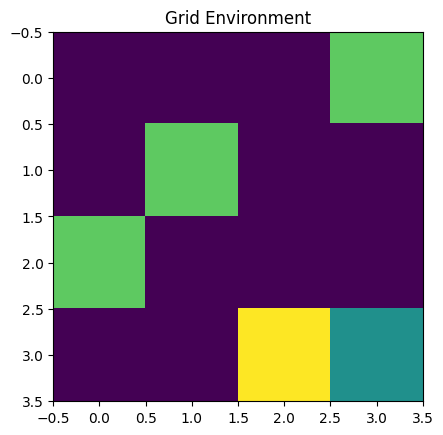

In [ ]:
action = 1
observation, reward, done, truncated, info = env.step(action)
env.render()

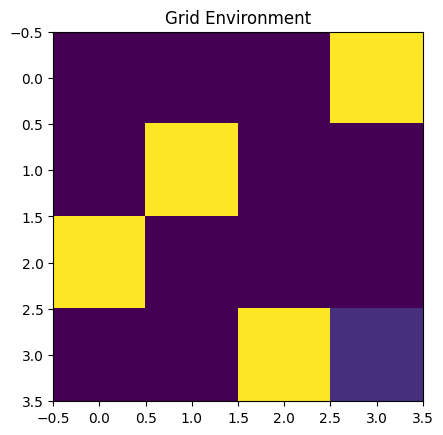

In [ ]:
action = 2
observation, reward, done, truncated, info = env.step(action)
env.render()

In [ ]:
# Definition an agent that takes action randomly
class RandomAgent:

  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
    self.qtable = None
    self.discount_factor = None
    self.gamma = 0.95
    self.epsilon = None
    self.numberofepisodes = 50

  def S(self, pos):
    return (pos[0]*4) + pos[1]

  def greedy(self, pos):
    ar = [0.01, 0.9, 0.056, 0.45, 0.0023, 0.78]
    x = randint(0, 5)
    x = ar[x]
    if x<self.epsilon:
      self.epsilon=(((self.epsilon*0.95)/self.epsilon)**(1/self.numberofepisodes))
      return np.random.choice(self.action_space.n)
    else:
      self.epsilon=(((self.epsilon*0.95)/self.epsilon)**(1/self.numberofepisodes))
      ar = list(self.qtable[self.S(pos)])
      return ar.index(max(ar))

  def sarsa(self):
    self.qtable = np.zeros((16,4))
    self.discount_factor = 0.15
    self.epsilon = 1
    for i in range(self.numberofepisodes): #for each episode
      self.env.reset() #initialize S
      state = self.env.agent_pos
      action = self.greedy(state)
      count = 0
      print(self.qtable)
      while self.env.check_if_goal_pos1 is not True:
        self.env.step(action)
        next_state = self.env.agent_pos
        next_action = self.greedy(next_state)
        S = self.S(state)
        S2 = self.S(next_state)
        if S >0 and S<16 and S2>0 and S2<16:
          self.qtable[S][action] = (self.qtable[S][action] + (self.discount_factor*(reward + (self.gamma*self.qtable[S2][next_action])-self.qtable[S][action])))
          state = next_state
          action = next_action

        else:
          count += 1
          if count == 50:
            break
        print(self.qtable)

  def QLearning(self):
    self.qtable = np.zeros((16,4))
    self.discount_factor = 0.15
    self.epsilon = 1
    print(self.qtable)
    for i in range(self.numberofepisodes): #for each episode
      self.env.reset() #initialize S
      while self.env.check_if_goal_pos1 is not True:
        state = self.env.agent_pos
        action = self.greedy(state)
        self.env.step(action)
        next_state = self.env.agent_pos
        S = self.S(state)
        S2 = self.S(next_state)
        if S >0 and S<16 and S2>0 and S2<16:
          self.qtable[S][action] = (self.qtable[S][action] + (self.discount_factor*(reward + (self.gamma*max(self.qtable[S2]))-self.qtable[S][action])))
          state = next_state
        print(self.qtable)



In [ ]:
# Sample code for environment and agent implementation. Also shows
# visualization of the random agent's movement across the grid. The yellow cell
# shows the movement of the agent.

if __name__ == '__main__':
  env = GridEnvironment()
  agent = RandomAgent(env)
  agent.sarsa()
  agent.QLearning()
  obs, info = env.reset()
  terminated, truncated = False, False

  while not terminated:
    action = agent.step(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    print('Action:', action, ', Reward:', reward, ', Done:', terminated)
    env.render()

Streaming output truncated to the last 5000 lines.
 [ 0.          7.7329377   1.77009984  4.29267673]
 [ 1.92589687  2.98875     5.56784672  3.59473296]
 [ 0.          1.5         1.5         0.        ]
 [ 1.5         2.98875     0.          0.        ]
 [ 3.85875     3.1704375   0.          0.        ]
 [ 2.98875     5.51354487  3.56068014  0.        ]
 [ 2.98875     1.5         1.5         0.        ]
 [ 0.          2.775       1.5         0.        ]]
[[ 0.          0.          0.          0.        ]
 [ 4.01318437  0.         12.01362841  9.91627167]
 [ 4.0725      0.         10.1282533   2.98875   ]
 [13.97929875  0.          7.37166289  1.5       ]
 [ 9.09893115 14.86598625  3.23697369  7.24069235]
 [ 0.          9.73470119 10.43812091  5.72228109]
 [ 1.71375     1.5         3.85875     0.        ]
 [ 5.48280746  3.38556218  2.775       0.        ]
 [ 0.          7.7329377   1.77009984  4.29267673]
 [ 1.92589687  2.98875     5.56784672  3.59473296]
 [ 0.          1.5         1.5

KeyboardInterrupt: ignored

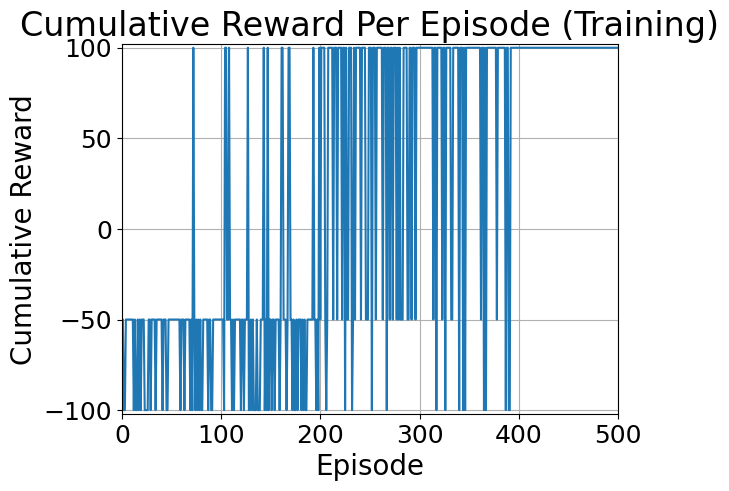

In [ ]:
# Generating reward values for sample graph
initial_rewards = np.random.choice([-50, -100, 100], 100, p=[0.7, 0.29, 0.01])
intermediate_rewards = np.random.choice([-50, -100, 100], 100, p=[0.6, 0.25, 0.15])
final_rewards_1 = np.random.choice([-50, -100, 100], 100, p=[0.3, 0.1, 0.6])
final_rewards_2 = np.random.choice([-50, -100, 100], 100, p=[0.05, 0.05, 0.9])
final_rewards_3 = np.random.choice([-50, -100, 100], 100, p=[0.00, 0.00, 1])

reward_per_episode = np.concatenate((initial_rewards, intermediate_rewards,
                                    final_rewards_1, final_rewards_2, final_rewards_3))

# Reward Dynamics: Sample example
plt.figure()
plt.plot(reward_per_episode)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Training)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([-100, -50, 0, 50, 100], fontsize=18)
plt.ylim(ymin=-102, ymax=102)
plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

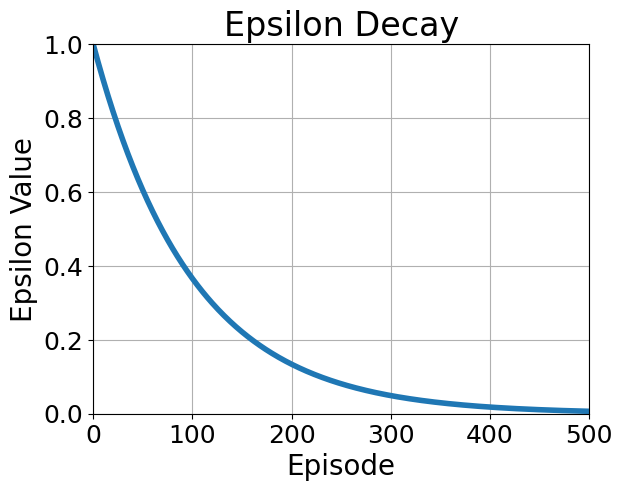

In [ ]:
# Generating epsilon values for a sample graph
epsilon_values = [(0.99 ** i) * 1 for i in range(500)]

# Epsilon-decay graph: Sample example
plt.figure()
plt.plot(epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()